In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2023-05-18 23:48:33.455297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-18 23:48:33.455341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import the data

In [2]:
training = pd.read_csv("training_data.csv")
test = pd.read_csv("testing_data.csv")

training = training[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]
test = test[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]

# Data visualisasi

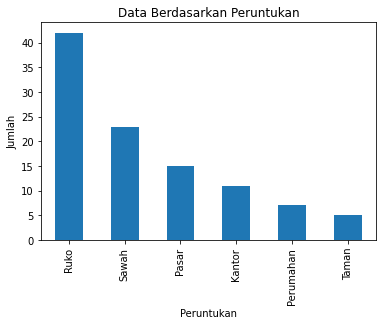

In [3]:
df = pd.read_csv('rumus + data skripsi angka polos jarak dan visibilitas 2.csv')

df['Peruntukan'].value_counts().plot(kind='bar')
plt.xlabel('Peruntukan')
plt.ylabel('Jumlah')
plt.title('Data Berdasarkan Peruntukan')
plt.show()

TypeError: text() missing 1 required positional argument: 's'

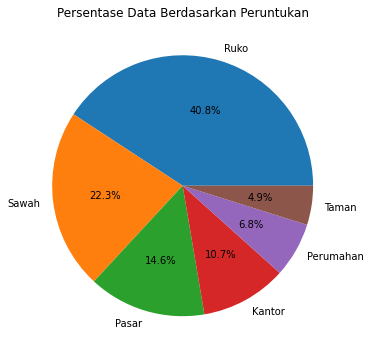

In [4]:
peruntukan_counts = df['Peruntukan'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(peruntukan_counts, labels=peruntukan_counts.index, autopct='%1.1f%%')
plt.title('Persentase Data Berdasarkan Peruntukan')

# Menampilkan jumlah data pada setiap kategori
for i, count in enumerate(peruntukan_counts):
    plt.text(x=0, y=0, horizontalalignment='center', verticalalignment='center')

plt.show()

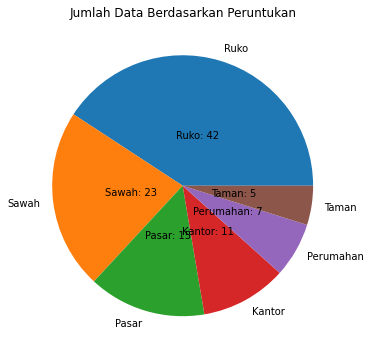

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Menghitung jumlah data pada setiap kategori
peruntukan_counts = df['Peruntukan'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(peruntukan_counts, labels=peruntukan_counts.index)

# Menampilkan jumlah data pada setiap kategori
for i, (patch, text) in enumerate(zip(patches, texts)):
    angle = (patch.theta2 - patch.theta1) / 2.0 + patch.theta1
    x = 0.4 * np.cos(np.deg2rad(angle))
    y = 0.4 * np.sin(np.deg2rad(angle))
    plt.text(x, y, f"{peruntukan_counts.index[i]}: {peruntukan_counts[i]}", ha='center', va='center')

plt.title('Jumlah Data Berdasarkan Peruntukan')
plt.show()


# Change categorical to number 

In [6]:
condition = [  training.Pusat_kota == "Pusat",
             training.Pusat_kota == "Sedang",
              training.Pusat_kota == "Pinggir",
]

value = [3,2,1]

training.Pusat_kota = np.select(condition,value)
####
####

condition = [  training.Visibilitas == "Strategis",
             training.Visibilitas == "Sedang",
              training.Visibilitas == "Kurang",
]

value = [3,2,1]

training.Visibilitas = np.select(condition,value)
#####
#####

condition = [  training.Bangunan == "Bagus",
             training.Bangunan == "Sedang",
             
]

value = [2,1]

training.Bangunan = np.select(condition,value,0)


condition = [ 
            training.Peruntukan == "Pasar",
             training.Peruntukan == "Kantor",
             training.Peruntukan == "Ruko",
             training.Peruntukan == "Taman",
             training.Peruntukan == "Perumahan",
             training.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

training.Peruntukan = np.select(condition,value,0)

In [7]:
condition = [  test.Pusat_kota == "Pusat",
             test.Pusat_kota == "Sedang",
              test.Pusat_kota == "Pinggir",
]

value = [3,2,1]

test.Pusat_kota = np.select(condition,value)
####
####

condition = [  test.Visibilitas == "Strategis",
             test.Visibilitas == "Sedang",
              test.Visibilitas == "Kurang",
]

value = [3,2,1]

test.Visibilitas = np.select(condition,value)
#####
#####

condition = [  test.Bangunan == "Bagus",
             test.Bangunan == "Sedang",
             
]

value = [2,1]

test.Bangunan = np.select(condition,value,0)


condition = [ 
            test.Peruntukan == "Pasar",
             test.Peruntukan == "Kantor",
             test.Peruntukan == "Ruko",
             test.Peruntukan == "Taman",
             test.Peruntukan == "Perumahan",
             test.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

test.Peruntukan = np.select(condition,value,0)

In [8]:
training

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,1,2,3,1,87580
1,1,2,3,1,87580
2,1,2,3,1,87580
3,1,2,3,1,87580
4,1,2,3,1,57945
...,...,...,...,...,...
123,2,3,3,0,1624
124,2,3,3,0,17033
125,2,3,3,0,2074
126,2,3,3,0,1700


In [9]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


# Dataframe to Dataset

In [10]:
def df_to_dataset(dataframe, shuffle=False, batch_size=4):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Peruntukan')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [11]:
train_ds = df_to_dataset(training)
val_ds = df_to_dataset(test)

2023-05-18 23:48:55.197503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-18 23:48:55.197595: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-18 23:48:55.197635: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gusanwa): /proc/driver/nvidia/version does not exist
2023-05-18 23:48:55.216693: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Feature Normalizer

In [12]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [13]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ["Pusat_kota","Visibilitas","Bangunan","Luas"]:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

# Model build

In [14]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(6)(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

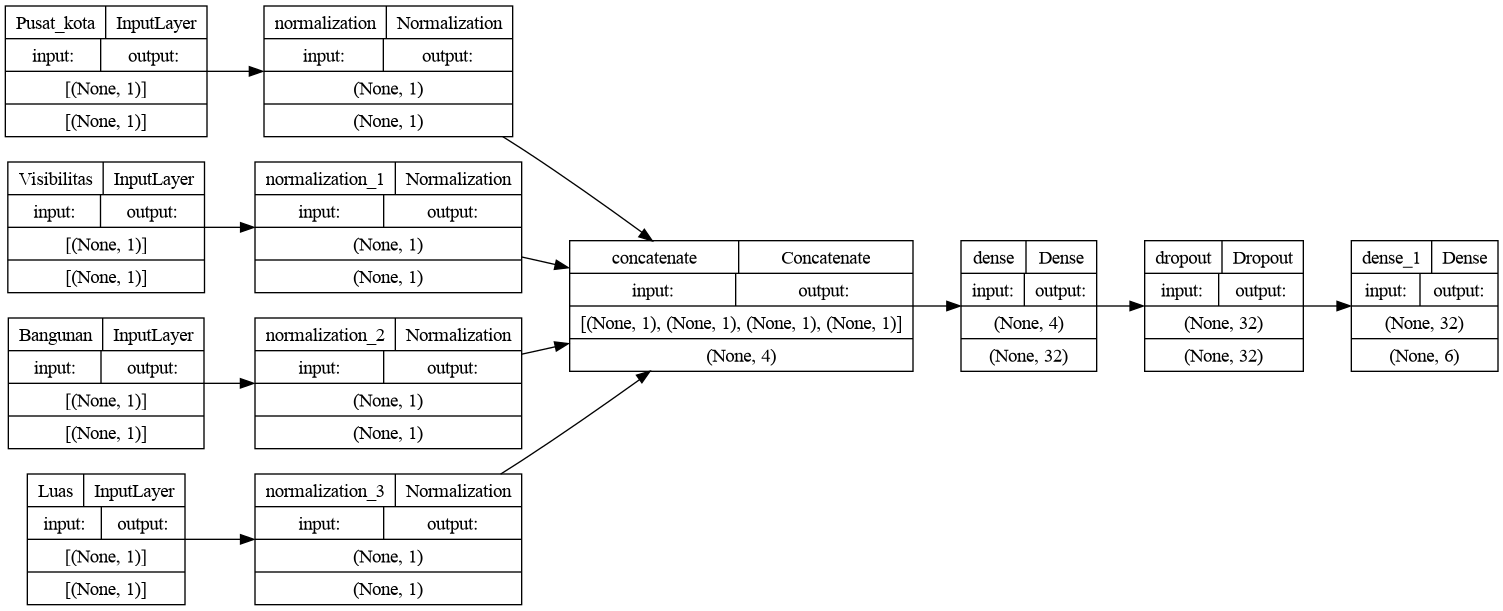

In [15]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [16]:
model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
32/32 [==============================] - 2s 13ms/step - loss: 1.8897 - accuracy: 0.1641 - val_loss: 1.7045 - val_accuracy: 0.1538
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.7495 - accuracy: 0.2500 - val_loss: 1.5947 - val_accuracy: 0.2308
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6286 - accuracy: 0.3125 - val_loss: 1.4977 - val_accuracy: 0.5385
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5490 - accuracy: 0.3984 - val_loss: 1.4149 - val_accuracy: 0.5385
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4880 - accuracy: 0.4141 - val_loss: 1.3399 - val_accuracy: 0.4615
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 1.4678 - accuracy: 0.5781 - val_loss: 1.2711 - val_accuracy: 0.5385
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3375 - accuracy: 0.5938 - val_loss: 1.2076 - val_accuracy: 0.6154
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8594 - val_loss: 0.3587 - val_accuracy: 0.9231
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8516 - val_loss: 0.3536 - val_accuracy: 0.9231
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.8359 - val_loss: 0.3497 - val_accuracy: 0.9231
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8828 - val_loss: 0.3425 - val_accuracy: 0.9231
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8828 - val_loss: 0.3370 - val_accuracy: 0.9231
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8516 - val_loss: 0.3343 - val_accuracy: 0.9231
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8750 - val_loss: 0.3296 - val_accuracy: 0.9231
Epoch 

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.9062 - val_loss: 0.2551 - val_accuracy: 0.9231
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.8984 - val_loss: 0.2543 - val_accuracy: 0.9231
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8750 - val_loss: 0.2549 - val_accuracy: 0.9231
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.9141 - val_loss: 0.2488 - val_accuracy: 0.9231
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2898 - accuracy: 0.9062 - val_loss: 0.2483 - val_accuracy: 0.9231
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8750 - val_loss: 0.2471 - val_accuracy: 0.9231
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8984 - val_loss: 0.2449 - val_accuracy: 0.9231
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.9297 - val_loss: 0.2106 - val_accuracy: 0.9231
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.9219 - val_loss: 0.2093 - val_accuracy: 0.9231
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9531 - val_loss: 0.2085 - val_accuracy: 0.9231
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2932 - accuracy: 0.8906 - val_loss: 0.2099 - val_accuracy: 0.9231
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9375 - val_loss: 0.2100 - val_accuracy: 0.9231
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.8984 - val_loss: 0.2068 - val_accuracy: 0.9231
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9297 - val_loss: 0.2051 - val_accuracy: 0.9231
Epoch 

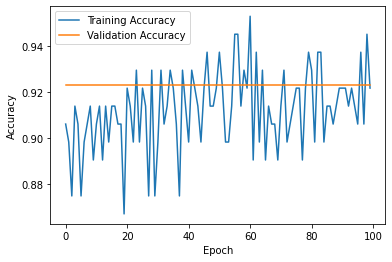

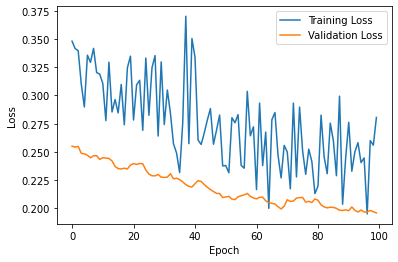

In [17]:
import matplotlib.pyplot as plt

history = model.fit(train_ds, epochs=100, validation_data=val_ds)

# Get the training and validation metrics from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


In [19]:
model.predict(val_ds)

array([[-1.3737887e+01, -3.6930206e+00, -1.3556559e+01,  4.3471026e+00,
         2.8565016e+00,  4.3435335e-02],
       [-1.1676425e+01, -2.9428461e+00, -1.7826712e+01,  1.4101655e+00,
         5.4713998e+00, -3.9037642e+00],
       [-8.6020403e+00, -1.3093125e+00, -7.7455282e+00, -4.8798048e-01,
         4.8462480e-02,  2.1488650e+00],
       [-8.2943220e+00, -1.9610317e+00, -1.9246585e+00, -1.6938910e+00,
        -4.4557080e+00,  2.3688760e+00],
       [ 1.0557811e+01,  2.3588269e+00, -4.4023075e+00, -9.9622774e+00,
        -2.4270313e+01, -3.0411888e+01],
       [ 1.0561806e+01,  2.2739296e+00, -4.3028040e+00, -9.4293203e+00,
        -2.4065823e+01, -3.0581505e+01],
       [ 1.0512383e+01,  2.2143083e+00, -4.2585645e+00, -9.0467920e+00,
        -2.3944162e+01, -3.0706528e+01],
       [-4.2965565e+00,  3.6704416e+00, -2.4276624e+00, -8.3632431e+00,
        -8.1169586e+00, -2.7569430e+00],
       [-1.2026626e-01,  4.4199977e+00, -1.0044415e+01, -8.5106287e+00,
        -5.2746353e+00, 

In [20]:
import numpy as np

y_pred = model.predict(val_ds)

         #   test.Peruntukan == "Pasar",
          #   test.Peruntukan == "Kantor",
           #  test.Peruntukan == "Ruko",
            # test.Peruntukan == "Taman",
             #test.Peruntukan == "Perumahan",
             #test.Peruntukan == "Sawah",
            
         #   value = [5,4,3,2,1,0]
y_pred



array([[-1.3737887e+01, -3.6930206e+00, -1.3556559e+01,  4.3471026e+00,
         2.8565016e+00,  4.3435335e-02],
       [-1.1676425e+01, -2.9428461e+00, -1.7826712e+01,  1.4101655e+00,
         5.4713998e+00, -3.9037642e+00],
       [-8.6020403e+00, -1.3093125e+00, -7.7455282e+00, -4.8798048e-01,
         4.8462480e-02,  2.1488650e+00],
       [-8.2943220e+00, -1.9610317e+00, -1.9246585e+00, -1.6938910e+00,
        -4.4557080e+00,  2.3688760e+00],
       [ 1.0557811e+01,  2.3588269e+00, -4.4023075e+00, -9.9622774e+00,
        -2.4270313e+01, -3.0411888e+01],
       [ 1.0561806e+01,  2.2739296e+00, -4.3028040e+00, -9.4293203e+00,
        -2.4065823e+01, -3.0581505e+01],
       [ 1.0512383e+01,  2.2143083e+00, -4.2585645e+00, -9.0467920e+00,
        -2.3944162e+01, -3.0706528e+01],
       [-4.2965565e+00,  3.6704416e+00, -2.4276624e+00, -8.3632431e+00,
        -8.1169586e+00, -2.7569430e+00],
       [-1.2026626e-01,  4.4199977e+00, -1.0044415e+01, -8.5106287e+00,
        -5.2746353e+00, 

In [21]:
val_ds

<BatchDataset element_spec=({'Pusat_kota': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Visibilitas': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Bangunan': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Luas': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
# Ubah output prediksi menjadi label kelas
label_kelas = ['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']
y_pred_label = [label_kelas[np.argmax(prediksi)] for prediksi in y_pred]

# Tampilkan hasil prediksi
print(y_pred_label)

['Ruko', 'Kantor', 'Pasar', 'Pasar', 'Sawah', 'Sawah', 'Sawah', 'Perumahan', 'Perumahan', 'Ruko', 'Ruko', 'Ruko', 'Taman']


In [23]:
for x in y_pred_label:
    print(x)

Ruko
Kantor
Pasar
Pasar
Sawah
Sawah
Sawah
Perumahan
Perumahan
Ruko
Ruko
Ruko
Taman


In [24]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


In [25]:
 [ -3.4406643 ,  -0.51060563,  -4.1595945 ,   2.022017  ,
         -0.9544041 ,  -2.0240772 ]

[-3.4406643, -0.51060563, -4.1595945, 2.022017, -0.9544041, -2.0240772]

In [26]:
['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']

['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']